In [89]:
import os
import numpy as np
import cv2
from keras.preprocessing import image

labels = ['A', 'B','C','G','I','L','O','R','W','Y']

img_size = 64
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img)) 
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [98]:
train = get_data('./mydata/training_set')
val = get_data('./mydata/test_set')

C:\Users\CHETHA~1\AppData\Local\Temp/ipykernel_44544/1348189763.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [101]:
train.shape

(17500, 2)

In [188]:
val.shape

(2500, 2)

C:\Users\Chethan Rao S\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

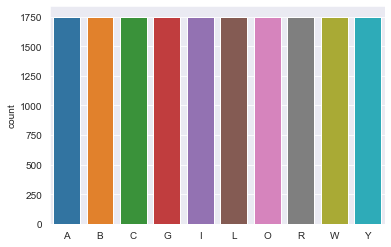

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
l = []
for i in train:
    if(i[1] == 0):
        l.append("A")
    elif(i[1]==1):
        l.append("B")
    elif(i[1]==2):
        l.append("C")
    elif(i[1]==3):
        l.append("G")
    elif(i[1]==4):
        l.append("I")
    elif(i[1]==5):
        l.append("L")
    elif(i[1]==6):
        l.append("O")
    elif(i[1]==7):
        l.append("R")
    elif(i[1]==8):
        l.append("W")
    else:
        l.append("Y")
        
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'A')

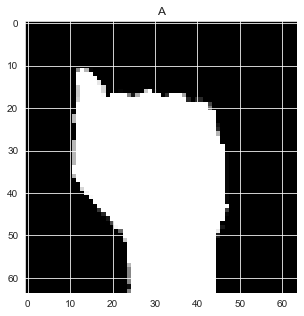

In [22]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'Y')

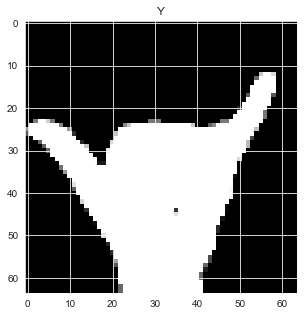

In [23]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [87]:
x_train = []
y_train = []
x_val = []
y_val = []


for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

x_train = np.array(x_train) 
x_val = np.array(x_val) 

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)


In [133]:
from keras.models import load_model
classifier = load_model('Trained_model.h5')

res=[]
data_dir = "./mydata/test_set"
labels = ['A', 'B','C','G','I','L','O','R','W','Y']

for label in labels: 
    path = os.path.join(data_dir, label)
    for img in os.listdir(path):
        img = image.load_img(os.path.join(path, img),target_size=(64,64))
        test_image = image.img_to_array(img)
        test_image = np.expand_dims(test_image, axis = 0)
        res.append(classifier.predict(test_image))

In [183]:
ls = []
for i in res:
    i = i[0]
    for j in range(len(i)):
        if(i[j]==1.0):
            ls.append(j)

# for i in range(0,13):
#     ls.append(9)
        
y_pred = np.array(ls)

In [269]:
# Save numpy array
# np.save("y_pred",y_pred)

# Load numpy array
y_pred = np.load('y_pred.npy')

In [284]:
from sklearn.metrics import classification_report
report = classification_report(y_val, y_pred,target_names=['A', 'B','C','G','I','L','O','R','W','Y'],output_dict=True)
print(report)

{'A': {'precision': 0.847457627118644, 'recall': 1.0, 'f1-score': 0.9174311926605504, 'support': 250}, 'B': {'precision': 0.9260700389105059, 'recall': 0.952, 'f1-score': 0.9388560157790926, 'support': 250}, 'C': {'precision': 1.0, 'recall': 0.992, 'f1-score': 0.9959839357429718, 'support': 250}, 'G': {'precision': 0.9957264957264957, 'recall': 0.932, 'f1-score': 0.962809917355372, 'support': 250}, 'I': {'precision': 0.8676470588235294, 'recall': 0.944, 'f1-score': 0.9042145593869731, 'support': 250}, 'L': {'precision': 0.9815668202764977, 'recall': 0.852, 'f1-score': 0.91220556745182, 'support': 250}, 'O': {'precision': 0.9759036144578314, 'recall': 0.972, 'f1-score': 0.973947895791583, 'support': 250}, 'R': {'precision': 0.995475113122172, 'recall': 0.88, 'f1-score': 0.9341825902335457, 'support': 250}, 'W': {'precision': 0.9224806201550387, 'recall': 0.952, 'f1-score': 0.937007874015748, 'support': 250}, 'Y': {'precision': 0.9477911646586346, 'recall': 0.944, 'f1-score': 0.945891783

In [285]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_val, y_pred)
print('Accuracy Score = ',acc_score)

Accuracy Score =  0.942


<AxesSubplot:>

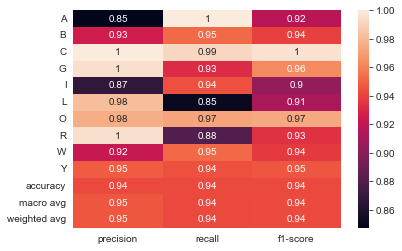

In [286]:
import seaborn as sns
import pandas as pd
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

In [309]:
f1_score={}
for alpha in report.keys():
    if alpha=="accuracy":
        break
    else:
        f1_score[alpha] = (report[alpha]['f1-score']*100)

In [310]:
f1_score

{'A': 91.74311926605505,
 'B': 93.88560157790926,
 'C': 99.59839357429718,
 'G': 96.2809917355372,
 'I': 90.42145593869732,
 'L': 91.22055674518201,
 'O': 97.3947895791583,
 'R': 93.41825902335457,
 'W': 93.7007874015748,
 'Y': 94.58917835671342}

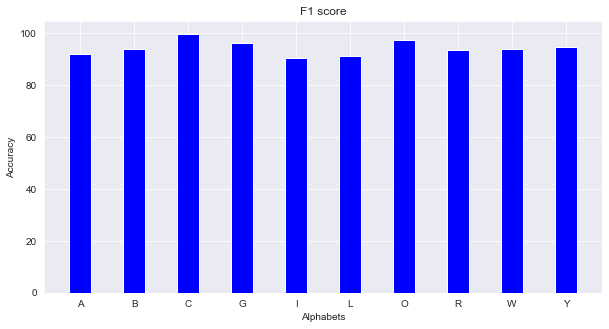

In [312]:
import matplotlib.pyplot as plt


alphabets = list(f1_score.keys())
score = list(f1_score.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(alphabets, score, color ='blue',
        width = 0.4)
 
plt.xlabel("Alphabets")
plt.ylabel("Accuracy")
plt.title("F1 score")
plt.show()